In [ ]:
import numpy as np
import pandas as pd

In [ ]:
headers_data = ["symboing", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "lenth", "width", "height", "crub-weight", "enginetype", "num-of-cyinders", "enien-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

In [ ]:
df = pd.read_csv("dataset_1.data",names = headers_data)

In [ ]:
df.replace("?",np.nan,inplace = True)

In [ ]:
m = df.isnull()
for i in headers_data:
  print(i)
  print(m[i].value_counts())
  print("\n")

symboing
symboing
False    205
Name: count, dtype: int64


normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64


make
make
False    205
Name: count, dtype: int64


fuel-type
fuel-type
False    205
Name: count, dtype: int64


aspiration
aspiration
False    205
Name: count, dtype: int64


num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64


body-style
body-style
False    205
Name: count, dtype: int64


drive-wheels
drive-wheels
False    205
Name: count, dtype: int64


engine-location
engine-location
False    205
Name: count, dtype: int64


wheel-base
wheel-base
False    205
Name: count, dtype: int64


lenth
lenth
False    205
Name: count, dtype: int64


width
width
False    205
Name: count, dtype: int64


height
height
False    205
Name: count, dtype: int64


crub-weight
crub-weight
False    205
Name: count, dtype: int64


enginetype
enginetype
False    205
Name: count, dtype: int64


num-of-cyinders
num-of-cyinders
False    

In [ ]:
avg_nor_loss = df['normalized-losses'].astype("float").mean()
df["normalized-losses"].replace(np.nan, avg_nor_loss, inplace=True)

avg_nor_loss = df['horsepower'].astype("float").mean()
df["horsepower"].replace(np.nan, avg_nor_loss, inplace=True)

avg_nor_loss = df['stroke'].astype("float").mean()
df["stroke"].replace(np.nan, avg_nor_loss, inplace=True)

avg_nor_loss = df["peak-rpm"].astype("float").mean()
df["peak-rpm"].replace(np.nan, avg_nor_loss, inplace=True)

avg_nor_loss = df["bore"].astype("float").mean()
df["bore"].replace(np.nan, avg_nor_loss, inplace=True)

<ipython-input-38-cf1d2fb1a29f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace(np.nan, avg_nor_loss, inplace=True)
<ipython-input-38-cf1d2fb1a29f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
max_door_count = df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, max_door_count, inplace = True)

<ipython-input-39-b1a1aa4cd89b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace(np.nan, max_door_count, inplace = True)


In [ ]:
df.dropna(subset = ["price"], inplace = True, axis = 0)
df.reset_index(drop = True, inplace = True)

 hi







gap

In [ ]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df[['normalized-losses','horsepower','stroke',"peak-rpm","bore"]] = imputer_mean.fit_transform(df[['normalized-losses','horsepower','stroke',"peak-rpm","bore"]]).astype('object')

imputer_mod = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
df[['num-of-doors']] = imputer_mod.fit_transform(df[["num-of-doors"]]).astype('object')

if you hand nu values by skearn then you thee data type automatically changes to the correct format

In [ ]:
df.to_csv("no_null_dataset.csv")

In [ ]:
df1 = pd.read_csv("no_null_dataset.csv")

In [ ]:
ls = ['normalized-losses','horsepower','stroke',"peak-rpm","bore"]
df[ls] = df[ls].astype('float')

bins

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df["horsepower"], bins, labels=group, include_lowest = True)
df['horsepower-binned'].head(20)

,horsepower-binned
0,Low
1,Low
2,Medium
3,Low
4,Low
5,Low
6,Low
7,Low
8,Medium
9,Low


pie chart

([<matplotlib.patches.Wedge at 0x7ac6f1c413f0>,
 [Text(-0.8046845170000946, 0.7499885519795118, 'low'),
  Text(0.7436773491276113, -0.8105208204571486, 'medium'),
  Text(1.0966427206448899, -0.08587632535556082, 'high')])

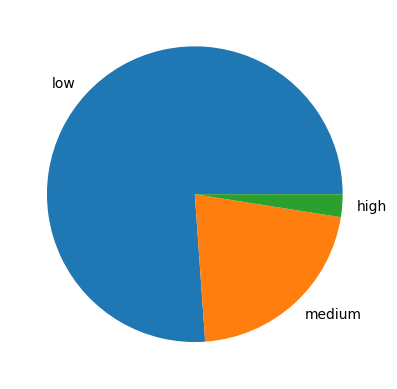

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['horsepower-binned'].value_counts(), labels=['low','medium','high'])

cateorica data

In [ ]:
dataset = pd.read_csv('Salary_Dataset.csv')
dataset

,country,Salary,YearsExperience,Purchased
0,Dubai,39343.0,1.1,No
1,Canada,46205.0,1.3,Yes
2,Canada,37731.0,1.5,No
3,Canada,43525.0,2.0,No
4,USA,39891.0,2.2,No
5,Dubai,56642.0,2.9,No
6,Canada,60150.0,3.0,Yes
7,Australia,54445.0,3.2,No
8,Dubai,64445.0,3.2,Yes
9,Dubai,57189.0,3.7,No


In [ ]:
country_dummy = pd.get_dummies(dataset['country'])
country_dummy

,Australia,Canada,Dubai,USA
0,False,False,True,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,False,False,True
5,False,False,True,False
6,False,True,False,False
7,True,False,False,False
8,False,False,True,False
9,False,False,True,False


In [ ]:
dataset = pd.concat([dataset, country_dummy], axis = 1)
dataset

,country,Salary,YearsExperience,Purchased,Australia,Canada,Dubai,USA
0,Dubai,39343.0,1.1,No,False,False,True,False
1,Canada,46205.0,1.3,Yes,False,True,False,False
2,Canada,37731.0,1.5,No,False,True,False,False
3,Canada,43525.0,2.0,No,False,True,False,False
4,USA,39891.0,2.2,No,False,False,False,True
5,Dubai,56642.0,2.9,No,False,False,True,False
6,Canada,60150.0,3.0,Yes,False,True,False,False
7,Australia,54445.0,3.2,No,True,False,False,False
8,Dubai,64445.0,3.2,Yes,False,False,True,False
9,Dubai,57189.0,3.7,No,False,False,True,False


In [ ]:
dataset.drop('country', axis=1, inplace = True)
dataset

,Salary,YearsExperience,Purchased,Australia,Canada,Dubai,USA
0,39343.0,1.1,No,False,False,True,False
1,46205.0,1.3,Yes,False,True,False,False
2,37731.0,1.5,No,False,True,False,False
3,43525.0,2.0,No,False,True,False,False
4,39891.0,2.2,No,False,False,False,True
5,56642.0,2.9,No,False,False,True,False
6,60150.0,3.0,Yes,False,True,False,False
7,54445.0,3.2,No,True,False,False,False
8,64445.0,3.2,Yes,False,False,True,False
9,57189.0,3.7,No,False,False,True,False


In [ ]:
dataset = dataset[['Australia',"Canada","Dubai","USA","Salary", "YearsExperience","Purchased"]]
dataset

,Australia,Canada,Dubai,USA,Salary,YearsExperience,Purchased
0,False,False,True,False,39343.0,1.1,No
1,False,True,False,False,46205.0,1.3,Yes
2,False,True,False,False,37731.0,1.5,No
3,False,True,False,False,43525.0,2.0,No
4,False,False,False,True,39891.0,2.2,No
5,False,False,True,False,56642.0,2.9,No
6,False,True,False,False,60150.0,3.0,Yes
7,True,False,False,False,54445.0,3.2,No
8,False,False,True,False,64445.0,3.2,Yes
9,False,False,True,False,57189.0,3.7,No


by sklearn lable encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset = pd.read_csv('Salary_Dataset.csv')  #taking to initial
dataset['Purchased'] = le.fit_transform(dataset['Purchased'])
dataset

,country,Salary,YearsExperience,Purchased
0,Dubai,39343.0,1.1,0
1,Canada,46205.0,1.3,1
2,Canada,37731.0,1.5,0
3,Canada,43525.0,2.0,0
4,USA,39891.0,2.2,0
5,Dubai,56642.0,2.9,0
6,Canada,60150.0,3.0,1
7,Australia,54445.0,3.2,0
8,Dubai,64445.0,3.2,1
9,Dubai,57189.0,3.7,0


one hot encoding in sklearn


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
dataset = pd.read_csv('Salary_Dataset.csv')
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
dataset = pd.DataFrame(pd.DataFrame(ct.fit_transform(dataset)))
dataset

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,0.0,39343.0,1.1,No
1,0.0,1.0,0.0,0.0,46205.0,1.3,Yes
2,0.0,1.0,0.0,0.0,37731.0,1.5,No
3,0.0,1.0,0.0,0.0,43525.0,2.0,No
4,0.0,0.0,0.0,1.0,39891.0,2.2,No
5,0.0,0.0,1.0,0.0,56642.0,2.9,No
6,0.0,1.0,0.0,0.0,60150.0,3.0,Yes
7,1.0,0.0,0.0,0.0,54445.0,3.2,No
8,0.0,0.0,1.0,0.0,64445.0,3.2,Yes
9,0.0,0.0,1.0,0.0,57189.0,3.7,No


train and test spittin of data


In [ ]:
df = pd.read_excel("Salary_Dataset_02.xls")
df

,Australia,Canada,Dubai,USA,Salary,YearsExperience,Purchased
0,0,0,1,0,39343,1.1,0
1,0,1,0,0,46205,1.3,1
2,0,1,0,0,37731,1.5,0
3,0,1,0,0,43525,2.0,0
4,0,0,0,1,39891,2.2,0
5,0,0,1,0,56642,2.9,0
6,0,1,0,0,60150,3.0,1
7,1,0,0,0,54445,3.2,0
8,0,0,1,0,64445,3.2,1
9,0,0,1,0,57189,3.7,0


sprating prdictor and prdicting

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

,Purchased
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


spit data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 56)

Fature scaling

In [ ]:
df = pd.read_excel("Salary_Dataset_02.xls")
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 56)

simple feature scaling
Xnew = Xold / Xmax


Standardization(Z-core)
Xstand = X-mean(X) / standerd dviation(X) (usefull in all type of case)


Normaization(min-max)
Xnew = X-Xmin / Xmax - Xmin  (Normal Distribution)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,4:] = sc.fit_transform(X_train.iloc[:,4:])
X_test.iloc[:,4:] = sc.transform(X_test.iloc[:,4:])

<ipython-input-100-2cbfd4d4ace2>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 57081.  91738.  54445.  43525.  63218. 121872.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.iloc[:,4:] = sc.transform(X_test.iloc[:,4:])
